# Classification Dictionary

This serves as a repository for functions regarding classification.

### List of Functions

1. Convert Column to Standard Units
2.

### Imports

In [147]:
import pandas as pd
import numpy as np
from datascience import *

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plots.style.use('fivethirtyeight')

df0 = pd.read_csv(r'banknote.csv')
df = df0.replace(to_replace = {
            'Class' : {(0):'Counterfit',
                       (1):'Real'}})
df

,WaveletVar,WaveletSkew,WaveletCurt,Entropy,Class
0,3.62160,8.66610,-2.8073,-0.44699,Counterfit
1,4.54590,8.16740,-2.4586,-1.46210,Counterfit
2,3.86600,-2.63830,1.9242,0.10645,Counterfit
3,3.45660,9.52280,-4.0112,-3.59440,Counterfit
4,0.32924,-4.45520,4.5718,-0.98880,Counterfit
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,Real
1368,-1.38870,-4.87730,6.4774,0.34179,Real
1369,-3.75030,-13.45860,17.5932,-2.77710,Real
1370,-3.56370,-8.38270,12.3930,-1.28230,Real


### 1. Convert Column to Standard Units

In [64]:
#Converts the float or int values from a column in a table to standard units
#and returns an array.
def convert_to_standard_units(table, column):
    arr_col = table[column]
    mean_col = np.mean(arr_col)
    sd_col = np.std(arr_col)
    standardized = (arr_col - mean_col) / sd_col
    return standardized

In [65]:
convert_to_standard_units(df, 'WaveletVar')[:5]

0    1.121806
1    1.447066
2    1.207810
3    1.063742
4   -0.036772
Name: WaveletVar, dtype: float64

### 2. Find Distance

In [66]:
#Returns the distance between two points
def find_distance(x, y):
    return np.sqrt(np.sum((x-y)**2))

In [67]:
find_distance(10, 40)

30.0

### 3. Splits a Data Set

In [68]:
#Splits a dataset
#Replace 'df' with desired dataframe
#Replace .75(default) w/ percent of data one wants to train the model on
df1 = df
training_proportion = .75

#Don't Touch!
num_rows = df1.shape[0]
train_num = num_rows*training_proportion

#Here are the sets
train_df = df1.take(np.arange(train_num))
test_df = df1.take(np.arange(train_num, num_rows))

#prints number of rows for training and testing.
#Don't Touch!
print('Training: ', train_df.shape[0],  
     ';', 'Test:', test_df.shape[0])

Training:  1029 ; Test: 343


### Scatterpots 3 variables

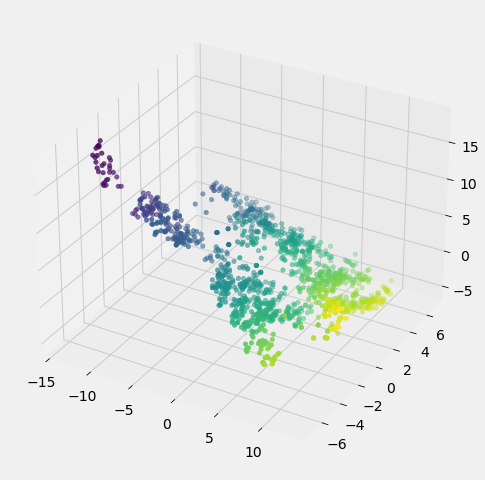

In [109]:
#replace df w/ desired df.
#replace col1, col2, and col3 with desired variables
df2 = df
col1 = 'WaveletSkew'
col2 = 'WaveletVar'
col3 = 'WaveletCurt'

scat = plt.figure(figsize=(8,8)).add_subplot(111, projection='3d')


# Create the colors list using the function above
scat.scatter( df2[col1], 
            df2[col2], 
            df2[col3],
             c = df2[col1]
             
         ) 

### Multiple Attribute Classification from Scratch

In [149]:
# Classifies an entire dataset 
def classification_from_scratch(df_to_train, columns, k_amount, classify_row):
    #Finds the distance between points in columns
    #And returns them as new columns
    row_to_classify = df.iloc[[classify_row]]
    
    #Returns the distance between two points
    def find_distance(x, y):
        return np.sqrt(np.sum((x-y)**2))
    
    def standard_units(x):
    return (x - np.mean(x))/np.std(x)

    def distance(point1, point2):
    """Returns the distance between point1 and point2
    where each argument is an array 
    consisting of the coordinates of the point"""
        return np.sqrt(np.sum((point1 - point2)**2))

    def all_distances(training, new_point):
    """Returns an array of distances
    between each point in the training set
    and the new point (which is a row of attributes)"""
        def distance_from_point(row):
            return distance(np.array(list(new_point)), np.array(list(row)))
    return attributes.apply(distance_from_point)
    return df.iloc[[classify_row]]

In [152]:
classification_from_scratch(train_df, [['WaveletSkew', 'WaveletVar', 'WaveletCurt']], 5, 0)

KeyError: "['Class'] not found in axis"